In [20]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/customer-behavior-analytcis/customer_behavior_analytcis.csv


In [21]:
df = pd.read_csv("/kaggle/input/customer-behavior-analytcis/customer_behavior_analytcis.csv")

In [4]:
df.shape

(999, 6)

In [5]:
df

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997


In [22]:
df['customer_id'] = df['customer_id'].str.extract('(\d+)').astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [7]:
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


In [8]:
df["total_purchases"].unique()

array([ 7., 22.,  2., 25., 12., 23., 27.,  9., 30.,  5.,  6., 13., 21.,
       15., 28., 24.,  4.,  3., 10., 17., 16., 29., 18.,  8., 19., 20.,
       14., nan, 11.,  1., 26., 32.,  0.])

In [9]:
df["avg_cart_value"].unique()

array([129.34,  24.18,  32.18,  26.85, 125.45, 199.56,  43.48,  46.58,
        35.1 ,  40.69,  62.6 ,  60.77, 105.96,  26.34, 100.  , 101.29,
        21.48,  48.23, 167.25,  42.  ,  37.21,  23.37,  20.49,  53.25,
        55.45, 167.57,  29.86, 196.93,  71.22, 180.97, 177.98, 159.86,
        13.66, 145.42,  54.62,  46.98, 117.71,  73.25, 187.29,  29.22,
        45.23,  55.15,  38.11,  11.88,  11.48,  18.26, 119.62, 158.27,
        49.86,  16.87,  37.37, 197.09,  51.23,  13.42,  45.09,  21.73,
       102.57,  37.52,  65.22,  73.75,  36.53, 173.02,  45.44, 144.3 ,
        35.9 ,  44.96,  26.35,  37.9 ,  43.4 ,  30.41,  27.63,  28.13,
        42.63,  41.98, 154.89, 108.61,  70.91,  43.91,  64.42, 142.64,
       106.2 , 107.12, 194.59,  61.2 , 109.66,  19.81, 143.28,  29.58,
        25.33,  33.72,  52.48,  59.02, 151.63,  44.74,  38.33,  20.57,
        48.01,    nan, 194.9 ,  16.21,  16.65,  44.68,  14.26,  36.72,
       188.33, 162.57,  30.23, 124.03,  26.23,  20.39,  68.64,  41.18,
      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

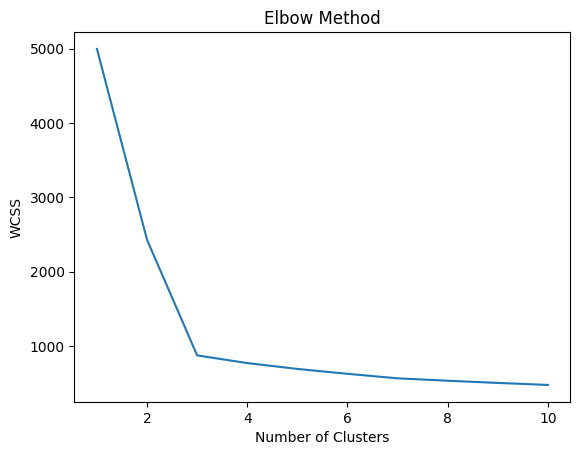

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6132930516948746


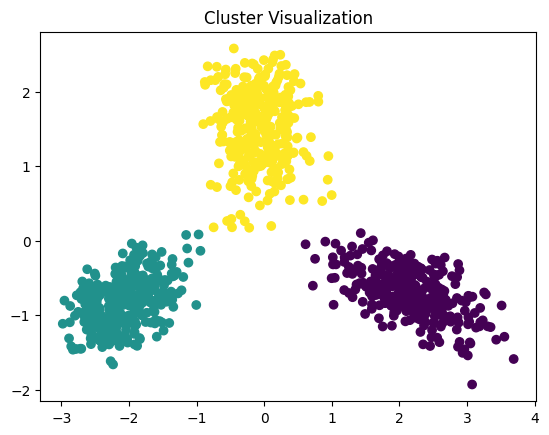

         total_purchases  avg_cart_value  total_time_spent  product_click  \
Cluster                                                                     
0              19.540531       31.346684         17.511682      15.224222   
1               4.943626       49.348259         90.211837      49.457687   
2              10.212991      145.390574         40.472126      20.120186   

         discount_counts  
Cluster                   
0               9.969970  
1               1.027108  
2               1.940120  


In [25]:
df.fillna(df.mean(), inplace=True)

# Feature scaling
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Silhouette Score
score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {score}')

# PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.show()

# Cluster interpretation
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)
